In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
import datetime
warnings.filterwarnings("ignore")
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Dropout, MaxPool2D, Activation,
    Flatten, Dense, Input, Concatenate, LeakyReLU, Add, AveragePooling2D
)
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
# from efficientnet.keras import EfficientNetB0

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import LearningRateScheduler
from tqdm.notebook import tqdm
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
test = pd.read_csv('/content/gdrive/My Drive/project/Mnist cnn dacon/data/test.csv')
train = pd.read_csv('/content/gdrive/My Drive/project/Mnist cnn dacon/data/train.csv')

NameError: ignored

In [ ]:
len(train),len(test)

(2048, 20480)

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
from PIL import Image
from numpy import asarray

data_list = []
for i in tqdm(range(len(train))):    #data는 엑셀 데이터(즉, 원본 데이터)
  image = Image.open('/content/gdrive/My Drive/데이콘 공유/open_cv_이미지 파일/image_updated/image_{}.jpg'.format(i)) #위에 디렉토리에서 사진을 가져오기
  data = asarray(image)
  data_list.append(data)
X_train = np.array(data_list)         #저는 train 데이터를 넣어서 X_train으로 이름 지었습니다.
X_train = X_train.reshape(-1, 28, 28, 1)
X_train = X_train/255
# X_train

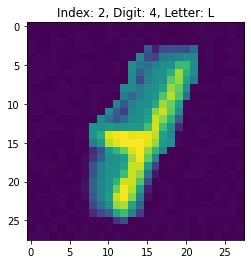

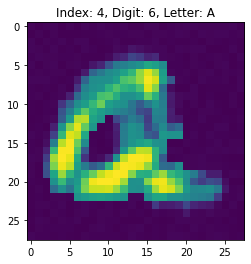

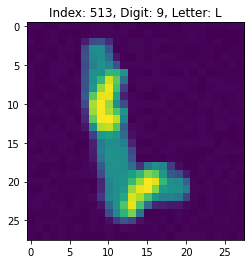

In [ ]:
idx_list = [2, 4, 513]
for idx in idx_list:
    img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
    digit = train.loc[idx, 'digit']
    letter = train.loc[idx, 'letter']

    plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
    plt.imshow(img)
    plt.show()

Train model

In [ ]:
y = train['digit']
y_train = np.zeros((len(y), len(y.unique())))
for i, digit in enumerate(y):
    y_train[i, digit] = 1


In [ ]:
# data 뻥튀기

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=40,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.01, # Randomly zoom image 
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    fill_mode="nearest"
        )

In [ ]:
# dropout_rate=0.5
model = Sequential()
model.add(Conv2D(256, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(Conv2D(256, kernel_size = 3, activation='relu'))
model.add(Conv2D(256, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(Conv2D(128, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(Dropout(0.5))



model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 256)       2560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 256)       590080    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 256)       1638656   
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       295040    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         4

In [ ]:
# DECREASE LEARNING RATE EACH EPOCH
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [ ]:
# 0.8578

validation=0.2
# epochs = 70
model.fit(X_train, y_train, epochs=epochs, verbose=2, validation_split=validation)
epochs = 40

Epoch 1/40
52/52 - 131s - loss: 2.3011 - accuracy: 0.1197 - val_loss: 2.2971 - val_accuracy: 0.1073
Epoch 2/40
52/52 - 130s - loss: 2.2689 - accuracy: 0.1514 - val_loss: 2.0389 - val_accuracy: 0.3171
Epoch 3/40
52/52 - 131s - loss: 1.7997 - accuracy: 0.3944 - val_loss: 1.2510 - val_accuracy: 0.5634
Epoch 4/40
52/52 - 136s - loss: 1.2500 - accuracy: 0.5702 - val_loss: 0.9038 - val_accuracy: 0.7146
Epoch 5/40
52/52 - 131s - loss: 1.0404 - accuracy: 0.6618 - val_loss: 0.7278 - val_accuracy: 0.7902
Epoch 6/40
52/52 - 131s - loss: 0.8441 - accuracy: 0.7241 - val_loss: 0.5940 - val_accuracy: 0.7927
Epoch 7/40
52/52 - 131s - loss: 0.7489 - accuracy: 0.7589 - val_loss: 0.4786 - val_accuracy: 0.8390
Epoch 8/40
52/52 - 136s - loss: 0.6793 - accuracy: 0.7741 - val_loss: 0.4115 - val_accuracy: 0.8585
Epoch 9/40
52/52 - 131s - loss: 0.5886 - accuracy: 0.7985 - val_loss: 0.4133 - val_accuracy: 0.8854
Epoch 10/40
52/52 - 132s - loss: 0.5137 - accuracy: 0.8437 - val_loss: 0.2884 - val_accuracy: 0.9024

In [ ]:
# 0.88
epochs = 70
BATCH_SIZE = 32

# Train data 90% : test data 10%로 나눕니다.
X_train2, X_val2, y_train2, y_val2 = train_test_split(
    X_train, y_train, test_size = 0.2)

history = model.fit_generator(
    datagen.flow(X_train2, y_train2, batch_size=BATCH_SIZE),
    epochs=epochs, 
    steps_per_epoch=X_train2.shape[0]//BATCH_SIZE,
    validation_data=(X_val2, y_val2), 
    callbacks=[annealer], 
    verbose=1
)


Epoch 1/70
51/51 [==============================] - 136s 3s/step - loss: 2.3319 - accuracy: 0.1015 - val_loss: 0.1718 - val_accuracy: 0.9561
Epoch 2/70
51/51 [==============================] - 134s 3s/step - loss: 2.3052 - accuracy: 0.1060 - val_loss: 0.1913 - val_accuracy: 0.9512
Epoch 3/70
51/51 [==============================] - 133s 3s/step - loss: 2.3028 - accuracy: 0.0978 - val_loss: 0.1981 - val_accuracy: 0.9512
Epoch 4/70
51/51 [==============================] - 132s 3s/step - loss: 2.3011 - accuracy: 0.1083 - val_loss: 0.1957 - val_accuracy: 0.9512
Epoch 5/70
51/51 [==============================] - 134s 3s/step - loss: 2.3000 - accuracy: 0.1083 - val_loss: 0.1956 - val_accuracy: 0.9512
Epoch 6/70
51/51 [==============================] - 137s 3s/step - loss: 2.3009 - accuracy: 0.1065 - val_loss: 0.1961 - val_accuracy: 0.9488
Epoch 7/70
51/51 [==============================] - 135s 3s/step - loss: 2.2999 - accuracy: 0.1146 - val_loss: 0.1953 - val_accuracy: 0.9488
Epoch 8/70
51

model save

In [ ]:
name = 'test0906_2'#이름
submission.to_csv('/content/drive/My Drive/데이콘 팀플/{}.csv'.format(name), index=False)#경로
model.save('/content/drive/My Drive/데이콘 팀플/{}.h5'.format(name))#경로

학습결과 시각화

Predict

In [ ]:
data_list2 = []
for i in tqdm(range(len(test))):    #data는 엑셀 데이터(즉, 원본 데이터)
  image = Image.open('/content/gdrive/My Drive/데이콘 공유/open_cv_이미지 파일/image_test_updated/image_{}.jpg'.format(i)) #위에 디렉토리에서 사진을 가져오기
  data = asarray(image)
  data_list2.append(data)
x_test = np.array(data_list2)         #저는 train 데이터를 넣어서 X_train으로 이름 지었습니다.
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test/255
# x_test

In [ ]:
submission = pd.read_csv('/content/gdrive/My Drive/project/Mnist cnn dacon/data/submission.csv')
submission['digit'] = np.argmax(model.predict(x_test), axis=1)
now = datetime.datetime.now().strftime('%Y-%m-%d %H_%M_%S')
submission.to_csv('DACON_08_'+ now +'.csv', index=False)

,id,digit
0,2049,6
1,2050,9
2,2051,6
3,2052,0
4,2053,3
...,...,...
20475,22524,4
20476,22525,1
20477,22526,6
20478,22527,8
